# Project 2 | Ordinary Differential Equations

## Question 1

### Part a

In [1]:
import numpy as np
deltat = 0.2
a = 0
b = 2

temporal = np.linspace(a, b, int((b-a)/deltat+1))
temporal

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ])

### Part b

Let us consider a standard function like $f(t, y) = y $

In [2]:
def FF(t, y = 1):
    Y = y  #This function does not use t at all
    return Y

In [3]:
def FEuler(func, a, b, y0, delta):
    temporal = np.linspace(a, b, int((b-a)/delta+1))
    U = np.ones(len(temporal))
    U[0] *= y0
    #print(U)
    bef = y0
    for i in range(1, len(temporal)):
        aft = bef + delta * func(temporal[i], bef)
        U[i] *= aft
        bef = aft
    return U

In [4]:
FEuler(FF, 0, 2, 1, 0.2)

array([1.        , 1.2       , 1.44      , 1.728     , 2.0736    ,
       2.48832   , 2.985984  , 3.5831808 , 4.29981696, 5.15978035,
       6.19173642])

We know that the specific solution for this situation is $y = e^t$

In [5]:
def AnsF(x):
    return np.exp(x)

In [6]:
AnsF(temporal)

array([1.        , 1.22140276, 1.4918247 , 1.8221188 , 2.22554093,
       2.71828183, 3.32011692, 4.05519997, 4.95303242, 6.04964746,
       7.3890561 ])

In [7]:
FEuler(FF, 0, 2, 1, 0.02)

array([1.        , 1.02      , 1.0404    , 1.061208  , 1.08243216,
       1.1040808 , 1.12616242, 1.14868567, 1.17165938, 1.19509257,
       1.21899442, 1.24337431, 1.26824179, 1.29360663, 1.31947876,
       1.34586834, 1.37278571, 1.40024142, 1.42824625, 1.45681117,
       1.4859474 , 1.51566634, 1.54597967, 1.57689926, 1.60843725,
       1.64060599, 1.67341811, 1.70688648, 1.74102421, 1.77584469,
       1.81136158, 1.84758882, 1.88454059, 1.9222314 , 1.96067603,
       1.99988955, 2.03988734, 2.08068509, 2.12229879, 2.16474477,
       2.20803966, 2.25220046, 2.29724447, 2.34318936, 2.39005314,
       2.43785421, 2.48661129, 2.53634352, 2.58707039, 2.63881179,
       2.69158803, 2.74541979, 2.80032819, 2.85633475, 2.91346144,
       2.97173067, 3.03116529, 3.09178859, 3.15362436, 3.21669685,
       3.28103079, 3.3466514 , 3.41358443, 3.48185612, 3.55149324,
       3.62252311, 3.69497357, 3.76887304, 3.8442505 , 3.92113551,
       3.99955822, 4.07954939, 4.16114038, 4.24436318, 4.32925

In [8]:
temporal = np.linspace(a, b, int((b-a)/0.02+1))
AnsF(temporal)

array([1.        , 1.02020134, 1.04081077, 1.06183655, 1.08328707,
       1.10517092, 1.12749685, 1.1502738 , 1.17351087, 1.19721736,
       1.22140276, 1.24607673, 1.27124915, 1.29693009, 1.32312981,
       1.34985881, 1.37712776, 1.40494759, 1.43332941, 1.46228459,
       1.4918247 , 1.52196156, 1.55270722, 1.58407398, 1.6160744 ,
       1.64872127, 1.68202765, 1.71600686, 1.7506725 , 1.78603843,
       1.8221188 , 1.85892804, 1.89648088, 1.93479233, 1.97387773,
       2.01375271, 2.05443321, 2.09593551, 2.13827622, 2.18147227,
       2.22554093, 2.27049984, 2.31636698, 2.36316069, 2.41089971,
       2.45960311, 2.50929039, 2.55998142, 2.61169647, 2.66445624,
       2.71828183, 2.77319476, 2.82921701, 2.88637099, 2.94467955,
       3.00416602, 3.0648542 , 3.12676837, 3.18993328, 3.2543742 ,
       3.32011692, 3.38718773, 3.45561346, 3.52542149, 3.59663973,
       3.66929667, 3.74342138, 3.81904351, 3.8961933 , 3.97490163,
       4.05519997, 4.13712044, 4.22069582, 4.30595953, 4.39294

### Part c | Implicit "Backward" Euler Implementation

The backward euler implementation uses information regarding the given function for the succeeding point in the sequence that we are trying to approximate in the first place. In our example, the euler function is just $f(t, y) = y$, so we can manipulate the equation as the following

$$ y_{k+1} - hf(t_{k+1}, y_{k+1}) = y_k $$

$$ \therefore (1-h)y_{k+1} = y_k $$

$$ \therefore y_{k+1} = \frac{y_k}{1-h} $$

We should just be able to iterate through this example process this way.

It is worth noting that it is apparently possible to construct an equivalent BEuler function to perhaps solve other acceptable functions with methods such as Newton's method. However, we will not be doing so in this project report.

In [9]:
def BEuler(a, b, y0, delta):  #Specific for f(t,y) = y unfortunately
    temporal = np.linspace(a, b, int((b-a)/delta+1))
    U = np.ones(len(temporal))
    U[0] *= y0
    for i in range(1, len(temporal)):
        U[i] = U[i-1]/(1-delta)
    return U

In [10]:
BEuler(0,2,1, .2)

array([1.        , 1.25      , 1.5625    , 1.953125  , 2.44140625,
       3.05175781, 3.81469727, 4.76837158, 5.96046448, 7.4505806 ,
       9.31322575])

### Part d | Convergence and Accuracy

In [11]:
def conv(delta1, delta2):
    delta = delta1
    temporal = np.linspace(a, b, int((b-a)/delta+1))
    trueend = AnsF(temporal)[-1]
    Bend = BEuler(0,2,1, delta)[-1]
    E1 = np.abs(Bend - trueend)
    
    delta = delta2
    temporal = np.linspace(a, b, int((b-a)/delta+1))
    trueend = AnsF(temporal)[-1]
    Bend = BEuler(0,2,1, delta)[-1]
    E2 = np.abs(Bend - trueend) 
    
    p = np.log(E1/E2) / np.log(delta1/delta2)
    print("Implicit euler implementation global error has a convergence order of " + str(p) + " when compared between delta values " + str(delta1) + " and " + str(delta2))
    
    
    delta = delta1
    temporal = np.linspace(a, b, int((b-a)/delta+1))
    trueend = AnsF(temporal)[-1]
    Bend = FEuler(FF, 0, 2, 1, delta)[-1]
    E1 = np.abs(Bend - trueend)
    
    delta = delta2
    temporal = np.linspace(a, b, int((b-a)/delta+1))
    trueend = AnsF(temporal)[-1]
    Bend = FEuler(FF, 0, 2, 1, delta)[-1]
    E2 = np.abs(Bend - trueend) 
    
    p = np.log(E1/E2) / np.log(delta1/delta2)
    print("Explicit euler implementation global error has a convergence order of " + str(p) + " when compared between delta values " + str(delta1) + " and " + str(delta2))
    
    return "----fin----"
    
    

In [12]:
conv(0.2, 0.02)

Implicit euler implementation global error has a convergence order of 1.1043758002667248 when compared between delta values 0.2 and 0.02
Explicit euler implementation global error has a convergence order of 0.9186129097977976 when compared between delta values 0.2 and 0.02


'----fin----'

In [21]:
td = 0.2
while td>0.002:
    conv(0.4, td)
    print("----fin----")
    td /= 2.

Implicit euler implementation global error has a convergence order of 1.5075754640543557 when compared between delta values 0.4 and 0.2
Explicit euler implementation global error has a convergence order of 0.7479727507885013 when compared between delta values 0.4 and 0.2
----fin----
Implicit euler implementation global error has a convergence order of 1.3549395123421666 when compared between delta values 0.4 and 0.1
Explicit euler implementation global error has a convergence order of 0.8019228145184765 when compared between delta values 0.4 and 0.1
----fin----
Implicit euler implementation global error has a convergence order of 1.2672498036668944 when compared between delta values 0.4 and 0.05
Explicit euler implementation global error has a convergence order of 0.8420678888792669 when compared between delta values 0.4 and 0.05
----fin----
Implicit euler implementation global error has a convergence order of 1.2114178604422183 when compared between delta values 0.4 and 0.025
Explicit

In [20]:
td = 0.2
tn = 0.4
while td>0.002:
    conv(tn, td)
    print("----fin----")
    tn = td
    td /= 2.

Implicit euler implementation global error has a convergence order of 1.5075754640543557 when compared between delta values 0.4 and 0.2
Explicit euler implementation global error has a convergence order of 0.7479727507885013 when compared between delta values 0.4 and 0.2
----fin----
Implicit euler implementation global error has a convergence order of 1.2023035606299775 when compared between delta values 0.2 and 0.1
Explicit euler implementation global error has a convergence order of 0.8558728782484516 when compared between delta values 0.2 and 0.1
----fin----
Implicit euler implementation global error has a convergence order of 1.0918703863163501 when compared between delta values 0.1 and 0.05
Explicit euler implementation global error has a convergence order of 0.9223580376008477 when compared between delta values 0.1 and 0.05
----fin----
Implicit euler implementation global error has a convergence order of 1.0439220307681896 when compared between delta values 0.05 and 0.025
Explici

The implicit euler implementation's global error appears to converge at an order of between 1.0 to 1.5, depending on what time step values we choose to compare between. The explicit euler implementation global error on the other hand appears to converge at an order of approximately 1. 

Both methods should be accurate to an order of 1. 

### Part e | Comparison between the 2 numerical methods

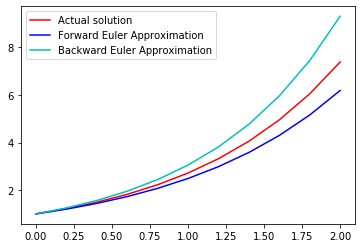

In [11]:
import matplotlib.pyplot as plt

a = 0
b = 2

delta = 0.2

temporal = np.linspace(a, b, int((b-a)/delta+1))
plt.plot(temporal, AnsF(temporal), 'r', label = 'Actual solution')
plt.plot(temporal, FEuler(FF, a, b, 1, delta), 'b', label = 'Forward Euler Approximation')
plt.plot(temporal, BEuler(a, b, 1, delta), 'c', label = 'Backward Euler Approximation')
plt.legend(loc = 'upper left')

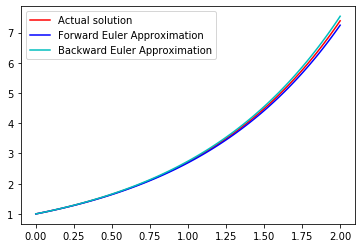

In [12]:
delta = 0.02

temporal = np.linspace(a, b, int((b-a)/delta+1))
plt.plot(temporal, AnsF(temporal), 'r', label = 'Actual solution')
plt.plot(temporal, FEuler(FF, a, b, 1, delta), 'b', label = 'Forward Euler Approximation')
plt.plot(temporal, BEuler(a, b, 1, delta), 'c', label = 'Backward Euler Approximation')
plt.legend(loc = 'upper left')

Let us use a norm function to quantify the distance between the actual solution and the estimated solutions. First let us consider for delta = 0.2 as before, with norms of power 2 and 10.

In [121]:
def norm(vector,power=2):
    sum = 0
    for i in vector:
        sum += i**power
    sum = sum**(1/power)
    
    return sum

#### $\Delta$t = 0.2

In [38]:
delta = 0.2

temporal = np.linspace(a, b, int((b-a)/delta+1))
norm(AnsF(temporal) - FEuler(FF, a, b, 1, delta))

1.7534383213106064

In [39]:
norm(AnsF(temporal) - BEuler( a, b, 1, delta))

2.7593413665128166

Now let us consider for norm of order 10, to further accentuate and study the role of the higher errors that are present for both estimations at later values of t. 

In [40]:
norm(AnsF(temporal) - FEuler(FF, a, b, 1, delta), 10)

1.2036163284002397

In [41]:
norm(AnsF(temporal) - BEuler( a, b, 1, delta), 10)

1.9323714966593428

#### $\Delta$t = 0.02

In [42]:
delta = 0.02

temporal = np.linspace(a, b, int((b-a)/delta+1))
norm(AnsF(temporal) - FEuler(FF, a, b, 1, delta))

0.5797484045146274

In [43]:
norm(AnsF(temporal) - BEuler( a, b, 1, delta))

0.6057558469522438

Again, let us consider for norm of order 10, to further accentuate and study the role of the higher errors that are present for both estimations at later values of t. 

In [44]:
norm(AnsF(temporal) - FEuler(FF, a, b, 1, delta), 10)

0.1651667574368465

In [45]:
norm(AnsF(temporal) - BEuler( a, b, 1, delta), 10)

0.17296207425108323

With smaller and more fine mesh lengths, the error between the actual solution and the approximations decreases. It also appears to be the case that the Backwards Euler estimaion method incurs a larger error than the forward euler method.

# Question 2

## Part a |Computing the eigenvalues

From the given matrix, we can derive the characteristic equation for the eigenvalues to be

$$ (-\lambda)(-\beta - \lambda) + \alpha = 0 $$

$$ \beta\lambda + \lambda ^2 + \alpha = 0 $$

$$ \therefore \lambda = \frac{-\beta -\sqrt(\beta ^2 - 4\alpha)}{2} $$

Since $\alpha$ and $\beta$ are both positive, both roots of the characteristic eigenvalue equation are negative, and therefore, the general solutions should be convergent and stable. 

## Part b | Explicit Euler Method

The explicit euler transformation is as follows

$$ y_{n+1} = y_n + \Delta t \cdot f(t_{n}, y_{n}) $$
$$ y_{n+1} = y_n + \Delta t \cdot(Ay_n(t_n) + b(t_n))$$
$$ y_{n+1} = y_n + \Delta t \cdot FB(t_n, y_n)$$

In [5]:
import numpy as np

In [6]:
def FEuler(func, a, b, y0,yp0, delta, x):  #the inputted function is going to be FB as shown above.
    temporal = np.linspace(a, b, int((b-a)/delta+1))
    yest = np.ones(len(temporal))
    ypest = np.ones(len(temporal))
    yest[0] *= y0
    ypest[0] *= yp0
    
    bef = np.array([y0, yp0])
    for i in range(1, len(temporal)):
        aft = bef + delta * func(temporal[i-1], bef[0], bef[1], x)
        #print(aft)
        ypest[i] = aft[1]
        yest[i] = aft[0]
        bef = aft
    return (temporal, yest, ypest)

Let us to set up the alpha and beta characteristic values.

In [7]:
alpha = 9E5*(((5E-3)**2 * 1E3)**-1)

In [8]:
beta = alpha**.5

We shall also construct the transformation matrix A. 

In [9]:
A = np.array([[0, 1], [-alpha, -beta]])

We set up the internal term as a function "FB", implemented below.

In [10]:
def FB(t, y, y_prime, x):
    Y = np.dot(A,np.array([y, y_prime])) + np.array([0, 3.3*x*0.25*133.32*(10*133.32 + 133.32*np.cos(2*np.pi*0.8**(-1.) * t ))])   #Set x to be 1
    return Y

### Initial Conditions

The following initial conditions are going to be applied similarly for the backward euler implementation and the Crank Nicolson method.

In [11]:
timestep = 1E-4
x = 2E-2  #x value based off of the fact that the maximum value would likely be L = 5*10^-2m as stated as one of the characteristic values

startingpoint = 0
endingpoint = 2.5E-3

initialy = 0    #initial y condition
initialyprime = 0    #initial y' condition

### Example implementation of Explicit Euler Method

We arrive at the following estimation of the solution using explicit euler method, with $x = 2.0 \times 10^{-2}$m, $\Delta t = 1.0 \times 10^{-4} $ and so forth.

In [12]:
FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestep , x)

(array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
        0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
        0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
        0.0024, 0.0025]),
 array([0.00000000e+00, 0.00000000e+00, 3.22602137e-05, 7.74245119e-05,
        1.16136764e-04, 1.36009046e-04, 1.34408923e-04, 1.17065808e-04,
        9.40015312e-05, 7.48922985e-05, 6.56682100e-05, 6.72774875e-05,
        7.65407661e-05, 8.82862863e-05, 9.76899019e-05, 1.01928346e-04,
        1.00715395e-04, 9.57960205e-05, 8.98307105e-05, 8.52179713e-05,
        8.32937405e-05, 8.41054656e-05, 8.67042609e-05, 8.97256262e-05,
        9.19804143e-05, 9.28408392e-05]),
 array([ 0.        ,  0.32260214,  0.45164298,  0.38712252,  0.19872282,
        -0.01600123, -0.17343115, -0.23064277, -0.19109233, -0.09224089,
         0.01609278,  0.09263279,  0.1174552 ,  0.09403616,  0.04238444,
        -0.01212951, -0.04919375, -0.0596531 , -0.04612739, -0.01

## Part c | Implicit Euler Method

For the implicit euler method, we visualise the following:

$$ y_{n+1} = y_n + \Delta t \cdot f(t_{n+1}, y_{n+1}) $$
$$ y_{n+1} = y_n + \Delta t \cdot (A y_{n+1} + b(t_{n+1})) $$

Note that we see no need to annotate A as $A(t_{n+1})$  simply because it is constant. 

$$ (I - \Delta t \cdot A) y_{n+1}  = y_n + \Delta t \cdot b(t_{n+1}) $$ 
$$ y_{n+1} = [(I - \Delta t \cdot A)]^{-1}  [y_n + \Delta t \cdot b(t_{n+1})] $$

The matrix looks like that

$$[(I - \Delta t \cdot A)]=$$  
\begin{bmatrix}
    1 & -\Delta t \\
    \alpha \Delta t & 1+ \beta \Delta t
\end{bmatrix}


$$ \therefore [(I - \Delta t \cdot A)]^{-1}= $$

\begin{bmatrix}
    \frac{1+ \beta \Delta t}{(1+\beta\Delta t  + \alpha \Delta t^2 )}  & \frac{\Delta t}{(1+\beta\Delta t  + \alpha \Delta t^2 )} \\
    \frac{-\alpha \Delta t}{(1+\beta\Delta t  + \alpha \Delta t^2 )} & \frac{1}{(1+\beta\Delta t  + \alpha \Delta t^2 )}
\end{bmatrix}

Where of course, $1+\beta\Delta t  + \alpha \Delta t^2$ refers to the determinant of the original matrix. 

$\therefore$
$$  y_{n+1} =  \begin{bmatrix}
    \frac{1+ \beta \Delta t}{(1+\beta\Delta t  + \alpha \Delta t^2 )}  & \frac{\Delta t}{(1+\beta\Delta t  + \alpha \Delta t^2 )} \\
    \frac{-\alpha \Delta t}{(1+\beta\Delta t  + \alpha \Delta t^2 )} & \frac{1}{(1+\beta\Delta t  + \alpha \Delta t^2 )}
\end{bmatrix} * [y_n + \Delta t \cdot b(t_{n+1})]  $$
$$ = Anew(\Delta t)*[y_n + \Delta t \cdot b(t_{n+1})]  $$

Unlike the previous example, in backwards euler transformation and Crank-Nicolson method later on, are dependent on the size of the temporal step we take. Therefore, we must be sure to take that into account. 

In [17]:
def Anew(deltatimestep):
    Det = 1+ beta*deltatimestep + alpha*deltatimestep**2.
    Anew = np.array([[1+beta*deltatimestep, deltatimestep], [-alpha*deltatimestep, 1]]) / Det
    return Anew

And the Euler transformation is set to be 


In [18]:
def BFB(t,y0, y0prime, delta, x ): #Transformation function for backwards euler
    Y = np.dot(Anew(delta) , (np.array([y0, y0prime])) + delta*np.array([0, 3.3*x*0.25*133.32*(10*133.32 + 133.32*np.cos(2*np.pi*0.8**(-1.) * t ))]))
    return Y

In [19]:
def BEuler(func, a, b, y0,yp0, delta, x):
    temporal = np.linspace(a, b, int((b-a)/delta+1))
    yest = np.ones(len(temporal))
    ypest = np.ones(len(temporal))
    yest[0] *= y0
    ypest[0] *= yp0
    bef = np.array([y0, yp0])
    for i in range(1, len(temporal)):
        aft =  BFB(temporal[i], bef[0], bef[1],delta ,x) 
        #print(aft)
        ypest[i] = aft[1]
        yest[i] = aft[0]        
        bef = aft
    return (temporal, yest, ypest)

### Example implementation of Implicit Euler Method

We arrive at the following estimation of the solution using implicit euler method. Constants used are of the same value as that of the explicit example previously.

In [20]:
BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestep , x)

(array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
        0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
        0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
        0.0024, 0.0025]),
 array([0.00000000e+00, 1.64592922e-05, 3.82930458e-05, 5.88585880e-05,
        7.49997358e-05, 8.59188347e-05, 9.21680692e-05, 9.48868952e-05,
        9.53051092e-05, 9.44727189e-05, 9.31551445e-05, 9.18320209e-05,
        9.07490782e-05, 8.99875731e-05, 8.95299225e-05, 8.93113447e-05,
        8.92548754e-05, 8.92914712e-05, 8.93688114e-05, 8.94527171e-05,
        8.95245434e-05, 8.95769951e-05, 8.96099080e-05, 8.96267862e-05,
        8.96323616e-05, 8.96311236e-05]),
 array([ 0.00000000e+00,  1.64592922e-01,  2.18337536e-01,  2.05655422e-01,
         1.61411478e-01,  1.09190990e-01,  6.24923446e-02,  2.71882597e-02,
         4.18214019e-03, -8.32390252e-03, -1.31757442e-02, -1.32312359e-02,
        -1.08294271e-02, -7.61505139e-03, -4.57650547e-0

## Part d | Crank - Nicolson Scheme

Crank Nicolson Scheme means that we are still solving an implicit case as previously but for the following

$$ y_{n+1} = y_n + \frac{\Delta t}{2}  \cdot (A y_n + b(t_n) + A y_{n+1} + b(t_{n+1})) $$
$$ (I - \frac{\Delta t}{2} A) y_{n+1} = \left[ y_n + \frac{\Delta t}{2} \left[ Ay_n + b(t_n) + b(t_{n+1}) \right]   \right] $$
$$  y_{n+1} = (I - \frac{\Delta t}{2} A) ^{-1} \left[ y_n + \frac{\Delta t}{2} \left[ Ay_n + b(t_n) + b(t_{n+1}) \right]   \right] $$

The inverse matrix is therefore (controlled for determinant) is therefore


\begin{bmatrix}
    \frac{1+ \frac{\beta \Delta t}{2}}{Det(I-\frac{\Delta t}{2} A)} & \frac{\Delta t}{2* Det(I-\frac{\Delta t}{2} A)} \\
    \frac{-\alpha \Delta t}{2* Det(I-\frac{\Delta t}{2} A)} & \frac{1}{Det(I-\frac{\Delta t}{2} A)}
\end{bmatrix}

Let us calculate this matrix and store it as a matrix called CNAnew. 

In [69]:
def CNAnew(deltatimestep):
    Det = 1+ .5*beta*deltatimestep + .25*alpha*deltatimestep**2.
    CNAnew = np.array([[1+.5*beta*deltatimestep, .5*deltatimestep], [-.5*alpha*deltatimestep, 1]]) / Det
    return CNAnew

We then formulate the transformation function that should be

$$  y_{n+1} =  \begin{bmatrix}
    \frac{1+ \frac{\beta \Delta t}{2}}{Det(I-\frac{\Delta t}{2} A)} & \frac{\Delta t}{2* Det(I-\frac{\Delta t}{2} A)} \\
    \frac{-\alpha \Delta t}{2* Det(I-\frac{\Delta t}{2} A)} & \frac{1}{2 * Det(I-\frac{\Delta t}{2} A)}
\end{bmatrix} * \left[ y_n + \frac{\Delta t}{2} \left[ Ay_n + b(t_n) + b(t_{n+1}) \right]   \right] $$

$$ = CNAnew(\Delta t) *  \left[ y_n + \frac{\Delta t}{2} \left[ Ay_n + b(t_n) + b(t_{n+1}) \right]   \right] $$

In [70]:
def CNFB(t_n,t_n1,y0, y0prime, delta, x ): #Transformation function for CN scheme
    Y_nplus1 = np.dot(CNAnew(delta) , (np.array([y0, y0prime])) + .5*delta*  (   np.dot(A, np.array([y0, y0prime])) +    np.array([0, 3.3*x*0.25*133.32*(10*133.32 + 133.32*np.cos(2*np.pi*0.8**(-1.) * t_n )) +3.3*x*0.25*133.32*(10*133.32 + 133.32*np.cos(2*np.pi*0.8**(-1.) * t_n1 )) ])   )    )
    return Y_nplus1

In [71]:
def CN(func, a, b, y0,yp0, delta, x):
    temporal = np.linspace(a, b, int((b-a)/delta+1))
    yest = np.ones(len(temporal))
    ypest = np.ones(len(temporal))
    yest[0] *= y0
    ypest[0] *= yp0
    #print(U)
    bef = np.array([y0, yp0])
    for i in range(1, len(temporal)):
        aft =  CNFB(temporal[i-1], temporal[i], bef[0], bef[1],delta ,x) 
        ypest[i] = aft[1]
        yest[i] = aft[0]  
        #print(aft)
        bef = aft
    return (temporal, yest, ypest)

In [72]:
CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestep , x)

(array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
        0.0008, 0.0009, 0.001 , 0.0011, 0.0012, 0.0013, 0.0014, 0.0015,
        0.0016, 0.0017, 0.0018, 0.0019, 0.002 , 0.0021, 0.0022, 0.0023,
        0.0024, 0.0025]),
 array([0.00000000e+00, 1.16043932e-05, 3.84030273e-05, 6.68965818e-05,
        8.89738074e-05, 1.01686495e-04, 1.05784392e-04, 1.03924778e-04,
        9.91608606e-05, 9.39801055e-05, 8.99042101e-05, 8.75118718e-05,
        8.66959601e-05, 8.69873032e-05, 8.78324775e-05, 8.87735076e-05,
        8.95252778e-05, 8.99747599e-05, 9.01360039e-05, 9.00916452e-05,
        8.99418978e-05, 8.97710112e-05, 8.96323421e-05, 8.95478699e-05,
        8.95160487e-05, 8.95223623e-05]),
 array([ 0.00000000e+00,  2.32087865e-01,  3.03884817e-01,  2.65986272e-01,
         1.75558241e-01,  7.86955190e-02,  3.26240560e-03, -4.04546693e-02,
        -5.48236872e-02, -4.87914149e-02, -3.27264928e-02, -1.51202734e-02,
        -1.19796209e-03,  7.02482584e-03,  9.87866036e-0

## Part e | Comparing the solutions

Let's set the y and y' plots as functions and control for values of x and timesteps, so as to observe whether the solutions converge to one another. 

### Code for t-y plots

In [99]:
def yplot(timestepcontrol, xcontrol, whichplotstoshow = 3):
    if whichplotstoshow == 3: #Compare all 3, default
        plt.plot(FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0] , FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], 'r', label = 'Forward solution for y')
        plt.plot(BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0] , BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], 'b', label = 'Backwards solution for y')
        plt.plot(CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0], CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], 'c', label = 'Crank Nicolson Scheme solution for y' )
        plt.legend(loc = 'lower right')
    elif whichplotstoshow == 2:#Compare backwards and CN
        plt.plot(BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0] , BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], 'b', label = 'Backwards solution for y')
        plt.plot(CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0], CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], 'c', label = 'Crank Nicolson Scheme solution for y' )
        plt.legend(loc = 'lower right')        
    elif whichplotstoshow == 1: #Compare forward and CN
        plt.plot(FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0] , FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], 'r', label = 'Forward solution for y')
        plt.plot(CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0], CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], 'c', label = 'Crank Nicolson Scheme solution for y' )
        plt.legend(loc = 'lower right')  
    elif whichplotstoshow == 0:  #Compare forward and backward  
        plt.plot(FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0] , FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], 'r', label = 'Forward solution for y')
        plt.plot(BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0] , BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], 'b', label = 'Backwards solution for y')        
        plt.legend(loc = 'lower right') 
    plt.show()

### Code for t-y' plots

In [100]:
def yprimeplot(timestepcontrol, xcontrol):
    plt.plot(FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0] , FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[2], 'r', label = 'Forward solution for y\' ')
    plt.plot(BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0] , BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[2], 'b', label = 'Backwards solution for y\'  ')
    plt.plot(CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[0], CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[2], 'c', label = 'Crank Nicolson Scheme solution for y\'  ' )
    plt.legend(loc = 'upper right')
    plt.show()

### Code for y-y' plots

In [101]:
def phaseplot(timestepcontrol, xcontrol):
    plt.plot(FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1] , FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[2], 'r', label = 'Forward solution  ')
    plt.plot(BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1] , BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[2], 'b', label = 'Backwards solution  ')
    plt.plot(CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[1], CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, timestepcontrol , xcontrol)[2], 'c', label = 'Crank Nicolson Scheme solution   ' )
    plt.legend(loc = 'lower right')
    plt.show()    

### t-y plots

Let us begin by plotting the timestep value of $1.0 \times 10^{-4}$s, and going down an order until -7.

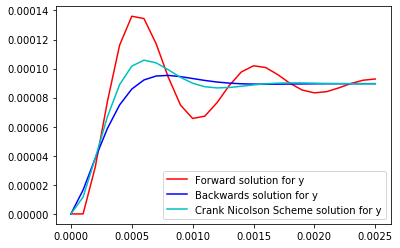

In [102]:
yplot(timestepcontrol = 1E-4, xcontrol = 2E-2)

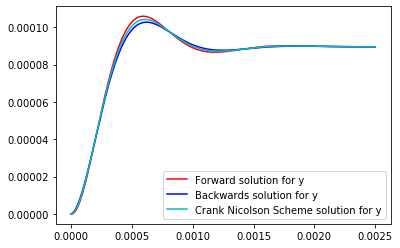

In [103]:
yplot(timestepcontrol = 1E-5, xcontrol = 2E-2)

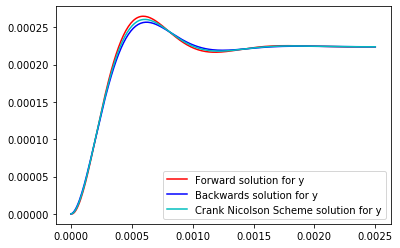

In [104]:
yplot(timestepcontrol = 1E-5, xcontrol = 5E-2)

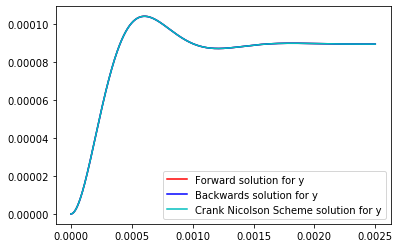

In [105]:
yplot(timestepcontrol = 1E-7, xcontrol = 2E-2)

By the time the timestep of $1.0 \times 10^{-7}$s is used, the solutions appear to converge almost perfectly from the start. 

### t-y' plots

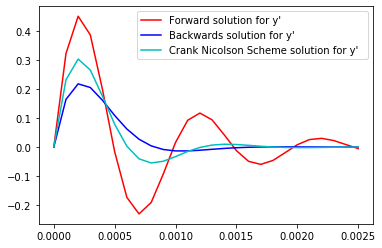

In [106]:
yprimeplot(timestepcontrol = 1E-4, xcontrol = 2E-2)

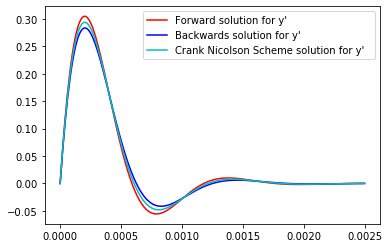

In [107]:
yprimeplot(timestepcontrol = 1E-5, xcontrol = 2E-2)

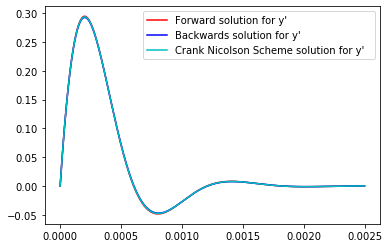

In [108]:
yprimeplot(timestepcontrol = 1E-6, xcontrol = 2E-2)

By the time we get to a timestep of $1.0 \times 10^{-6}$s the y' solutions appear to almost completely mirror each other - an order earlier than previously. Let us observe how the y' solutions look like with $1.0 \times 10^{-7}$s nonetheless.

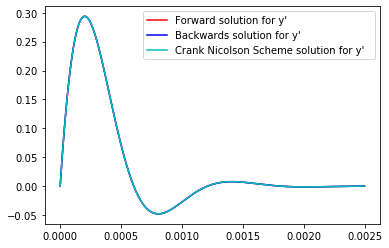

In [112]:
yprimeplot(timestepcontrol = 1E-7, xcontrol = 2E-2)

The plots look almost identical. They all appear to converge to a value close to 0.

### Phase plots | y-y'

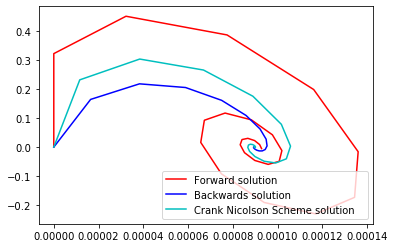

In [109]:
phaseplot(1E-4, 2E-2)

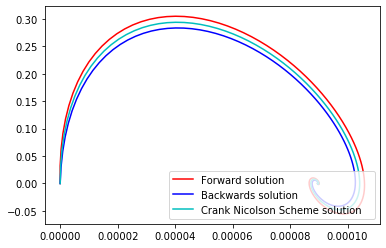

In [110]:
phaseplot(1E-5, 2E-2)

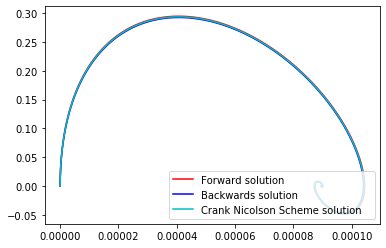

In [111]:
phaseplot(1E-6, 2E-2)

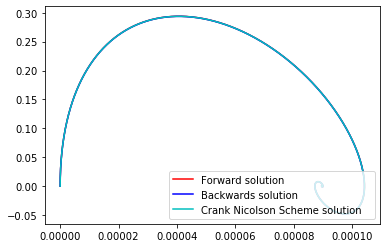

In [113]:
phaseplot(1E-7, 2E-2)

The phase plots all appear to converge a value of y approximately between 0.00008 and 0.00010, near a value of 0 for y'. We will examine the actual values closer later. 

## Quantifying the differences between the methods 

Let us use our norm function to get an idea for the difference between the various solutions. 

### Shortening our formulae

For brevity's sake, let us revisit and succintly reconstruct our vectors for the solutions. We know that we just want to adjust the timestep and perhaps x as we study the norms. 

In [119]:
def Forwardy(deltatime, xref):
    return FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, deltatime , xref)[1]

def Forwardyp(deltatime, xref):
    return FEuler(FB, startingpoint, endingpoint, initialy, initialyprime, deltatime , xref)[2]

def Backwardy(deltatime, xref):
    return BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, deltatime , xref)[1]

def Backwardyp(deltatime, xref):
    return BEuler(BFB, startingpoint, endingpoint, initialy, initialyprime, deltatime , xref)[2]

def CNy(deltatime, xref):
    return CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, deltatime , xref)[1]

def CNyp(deltatime, xref):
    return CN(CNFB, startingpoint, endingpoint, initialy, initialyprime, deltatime , xref)[2]

### Norm order 2 Examination

#### Comparison between backwards and forwards

##### For x = $2 \times 10^{-2}$m

In [140]:
t = 1E-4
x = 2E-2

norm(Forwardy(t, x) - Backwardy(t,x), 2)

9.792035768344814e-05

In [123]:
t = 1E-5
x = 2E-2

norm(Forwardy(t, x) - Backwardy(t,x), 2)

2.4587401887980154e-05

In [124]:
t = 1E-6
x = 2E-2

norm(Forwardy(t, x) - Backwardy(t,x), 2)

7.760660377661605e-06

##### For x = $4 \times 10^{-2}$m

In [125]:
t = 1E-4
x = 4E-2

norm(Forwardy(t, x) - Backwardy(t,x), 2)

0.00019584071536689628

In [128]:
t = 1E-5
x = 4E-2

norm(Forwardy(t, x) - Backwardy(t,x), 2)

4.917480377596031e-05

In [129]:
t = 1E-6
x = 4E-2

norm(Forwardy(t, x) - Backwardy(t,x), 2)

1.552132075532321e-05

##### For x = $4 \times 10^{-2}$m

In [131]:
t = 1E-4
x = 5E-2

norm(Forwardy(t, x) - Backwardy(t,x), 2)

0.0002448008942086204

In [132]:
t = 1E-5
x = 5E-2

norm(Forwardy(t, x) - Backwardy(t,x), 2)

6.146850471995057e-05

In [133]:
t = 1E-6
x = 5E-2

norm(Forwardy(t, x) - Backwardy(t,x), 2)

1.940165094414779e-05

#### Plot summary | How the backwards and forwards solutions vary with respect to each other with varying x and $\Delta t$

Instead of looking at specific numbers, let us try to observe any trends in the difference in the solutions with plots.

#### Comparison between forwards and backwards euler approximations | Trend with x and $\Delta t$

##### Norm vs x

Text(0.5, 1.0, 'Difference between backwards and forward euler solutions across x values')

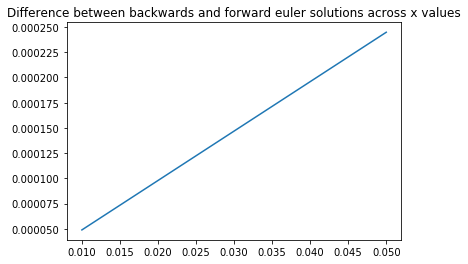

In [156]:
t = 1E-4
xx = np.linspace(1E-2, 5E-2, 100)
normvector = []

for i in xx:
    normvector.append(norm(Forwardy(deltatime = t,xref = i) - Backwardy(deltatime = t,xref = i), 2))

plt.plot(xx, normvector)
plt.title('Difference between backwards and forward euler solutions across x values')

Norm vs $\Delta t$

Text(0.5, 1.0, 'Difference between backwards and forward euler solutions across t values')

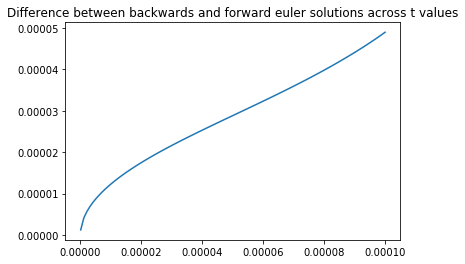

In [157]:
x = 1E-2
tt = np.linspace(1E-7, 1E-4, 100)
normvector = []

for i in tt:
    normvector.append(norm(Forwardy(deltatime = i, xref = x) - Backwardy(deltatime = i, xref = x), 2))

plt.plot(tt, normvector)
plt.title('Difference between backwards and forward euler solutions across t values')

For both cases, the differences between the forward and backward euler methods appear to be maximised when x and the timestep are at maximum.

#### Comparison between backwards and Crank-Nicolson Scheme

##### Norm vs x

Text(0.5, 1.0, 'Difference between backwards and CN scheme across x values')

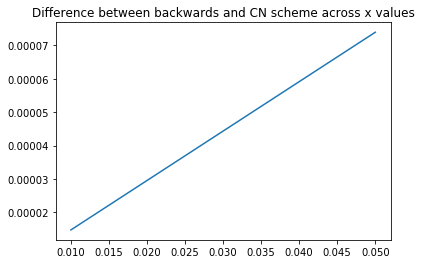

In [153]:
t = 1E-4
xx = np.linspace(1E-2, 5E-2, 100)
normvector = []

for i in xx:
    normvector.append(norm(CNy(deltatime = t,xref = i) - Backwardy(deltatime = t,xref = i), 2))

plt.plot(xx, normvector)
plt.title('Difference between backwards and CN scheme across x values')

Norm vs $\Delta t$

Text(0.5, 1.0, 'Difference between backwards and CN scheme across t values')

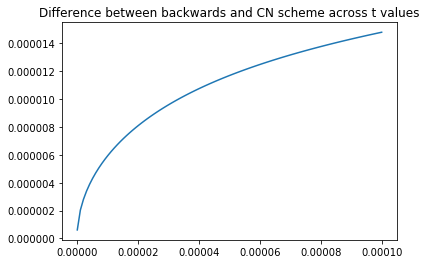

In [155]:
x = 1E-2
tt = np.linspace(1E-7, 1E-4, 100)
normvector = []

for i in tt:
    normvector.append(norm(CNy(deltatime = i, xref = x) - Backwardy(deltatime = i, xref = x), 2))

plt.plot(tt, normvector)
plt.title('Difference between backwards and CN scheme across t values')

#### Comparison between forwards and Crank-Nicolson Scheme

##### Norm vs x

Text(0.5, 1.0, 'Difference between forward and CN scheme across x values')

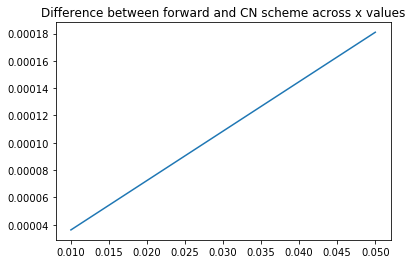

In [158]:
t = 1E-4
xx = np.linspace(1E-2, 5E-2, 100)
normvector = []

for i in xx:
    normvector.append(norm(CNy(deltatime = t,xref = i) - Forwardy(deltatime = t,xref = i), 2))

plt.plot(xx, normvector)
plt.title('Difference between forward and CN scheme across x values')

Norm vs $\Delta t$

Text(0.5, 1.0, 'Difference between forward and CN scheme across t values')

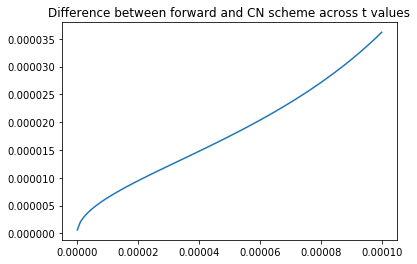

In [160]:
x = 1E-2
tt = np.linspace(1E-7, 1E-4, 100)
normvector = []

for i in tt:
    normvector.append(norm(CNy(deltatime = i, xref = x) - Forwardy(deltatime = i, xref = x), 2))

plt.plot(tt, normvector)
plt.title('Difference between forward and CN scheme across t values')

Approximated solutions appear to distance from each other linearly with respect to the chosen value of x, however, for chosen values of $\Delta t$, the distance between backwards and CN scheme solutions seem to increase logarithmically with increased chosen time step values. For the remaining pairwise comparisons, distance between solutions appear to linearly increase generally with increased time steps values. 

Overall, the distance between the forward and backward euler approximations appear to be the largest (maximum of $5.0 \times 10^{-5}$), while the distance between backwards and crank-nicolson scheme solutions appear to be the smallest (maximum of $1.4 \times 10^{-5}$) when we compare the range of distance values possible between these methods in question with respect to varying $\Delta t$ values. 

### Norm order 10 Examination

To highlight possibly more specifically distant points between solutions we can use a higher norm to greater express bigger distances for particular points. 

##### Norm vs x

Text(0.5, 1.0, 'Difference between backwards and forward euler solutions across x values')

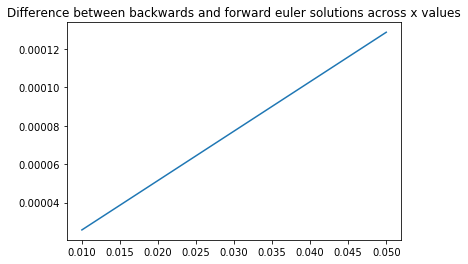

In [161]:
t = 1E-4
xx = np.linspace(1E-2, 5E-2, 100)
normvector = []

for i in xx:
    normvector.append(norm(Forwardy(deltatime = t,xref = i) - Backwardy(deltatime = t,xref = i), 10))

plt.plot(xx, normvector)
plt.title('Difference between backwards and forward euler solutions across x values')

Norm vs $\Delta t$

Text(0.5, 1.0, 'Difference between backwards and forward euler solutions across t values')

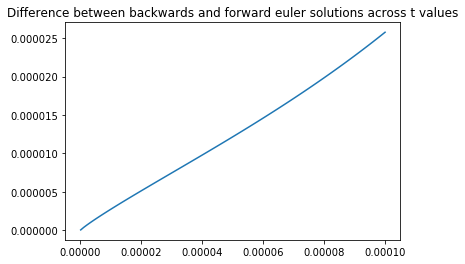

In [162]:
x = 1E-2
tt = np.linspace(1E-7, 1E-4, 100)
normvector = []

for i in tt:
    normvector.append(norm(Forwardy(deltatime = i, xref = x) - Backwardy(deltatime = i, xref = x), 10))

plt.plot(tt, normvector)
plt.title('Difference between backwards and forward euler solutions across t values')

For both cases, the differences between the forward and backward euler methods appear to be maximised when x and the timestep are at maximum.

#### Comparison between backwards and Crank-Nicolson Scheme

##### Norm vs x

Text(0.5, 1.0, 'Difference between backwards and CN scheme across x values')

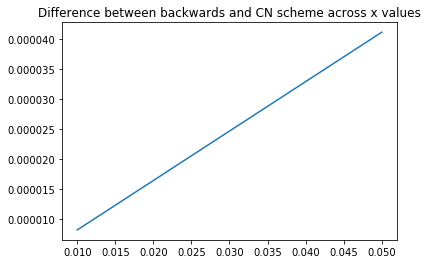

In [163]:
t = 1E-4
xx = np.linspace(1E-2, 5E-2, 100)
normvector = []

for i in xx:
    normvector.append(norm(CNy(deltatime = t,xref = i) - Backwardy(deltatime = t,xref = i), 10))

plt.plot(xx, normvector)
plt.title('Difference between backwards and CN scheme across x values')

Norm vs $\Delta t$

Text(0.5, 1.0, 'Difference between backwards and CN scheme across t values')

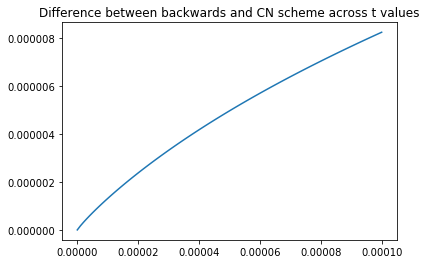

In [164]:
x = 1E-2
tt = np.linspace(1E-7, 1E-4, 100)
normvector = []

for i in tt:
    normvector.append(norm(CNy(deltatime = i, xref = x) - Backwardy(deltatime = i, xref = x), 10))

plt.plot(tt, normvector)
plt.title('Difference between backwards and CN scheme across t values')

#### Comparison between forwards and Crank-Nicolson Scheme

##### Norm vs x

Text(0.5, 1.0, 'Difference between forward and CN scheme across x values')

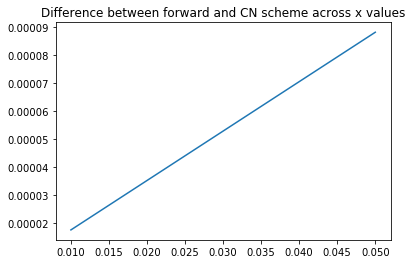

In [165]:
t = 1E-4
xx = np.linspace(1E-2, 5E-2, 100)
normvector = []

for i in xx:
    normvector.append(norm(CNy(deltatime = t,xref = i) - Forwardy(deltatime = t,xref = i), 10))

plt.plot(xx, normvector)
plt.title('Difference between forward and CN scheme across x values')

Norm vs $\Delta t$

Text(0.5, 1.0, 'Difference between forward and CN scheme across t values')

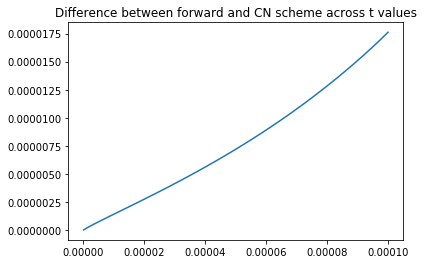

In [166]:
x = 1E-2
tt = np.linspace(1E-7, 1E-4, 100)
normvector = []

for i in tt:
    normvector.append(norm(CNy(deltatime = i, xref = x) - Forwardy(deltatime = i, xref = x), 10))

plt.plot(tt, normvector)
plt.title('Difference between forward and CN scheme across t values')

The differences between the various methods appear to become more linear with increasing values of x and $\Delta t$ with higher order norms quantifying the "distances" between the different solutions.

The same trend is seen here however, that the distance between the 2 methods is greatest for forwards versus backwards (maximum of $2.5 \times 10^{-5}$), and smallest for backwards versus Crank-Nicolson scheme method(maximum of $8.0 \times 10^{-6}$). 

## Notes about Accuracy

Although, it is expected that Crank-Nicolson will be accurate to an order of 2, while the other 2 methods are to be accurate to an order of 1, there is no real way for us to ascertain this apparently since we do not have the true solution curve. 